In [1]:
!nvidia-smi

Fri Mar  2 19:30:08 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M40 24GB      Off  | 0000:02:00.0     Off |                    0 |
| N/A   39C    P0    57W / 250W |   7173MiB / 22939MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os

In [3]:
os.getcwd()

'/home/16mcmi16'

In [4]:
os.listdir()

['.mozilla',
 '.bash_logout',
 '.bash_profile',
 '.bashrc',
 '.emacs',
 '.cache',
 '.config',
 '.bash_history',
 '.ipython',
 '.keras',
 '.theano',
 '.rnd',
 '.continuum',
 '.bashrc-miniconda2.bak',
 '.dbus',
 'naveenproject',
 '.Xauthority',
 '.conda',
 '.theanorc',
 '.nv',
 '.local',
 '.esd_auth',
 '.gstreamer-0.10',
 'Desktop',
 'perl5',
 'Downloads',
 '.emacs.d',
 '.pki',
 'Train_img_dataset3.h5',
 'cnn_utils.py',
 'tiny-imagenet training.ipynb',
 '.kde',
 '.defaults-0.1.0.ini',
 '__pycache__',
 '.jupyter',
 '.ipynb_checkpoints',
 '.ssh',
 '.bashrc-anaconda3.bak',
 '.bashrc.save',
 '.python_history',
 '.pyxbld',
 'data',
 'anaconda3']

In [5]:
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt

/home/16mcmi16/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
hf=h5py.File("Train_img_dataset3.h5","r")

In [7]:
L1=list(hf.keys())

In [8]:
L1

['train_data']

In [9]:
len(L1)

1

In [10]:
L1[0]

'train_data'

In [11]:
d1=hf.get('train_data')

In [12]:
d1

<HDF5 dataset "train_data": shape (100000, 64, 64, 3), type "<f4">

In [13]:
d1.shape

(100000, 64, 64, 3)

In [14]:
import numpy as np

In [15]:
n1=np.asarray(d1)

In [16]:
n1.shape

(100000, 64, 64, 3)

In [17]:
n1.dtype

dtype('float32')

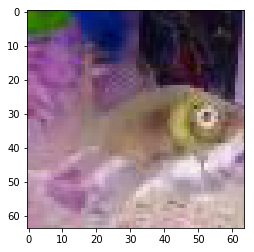

In [18]:
plt.imshow(n1[0])
plt.show()

In [19]:
# Assigning Labels

# Define the number of classes
num_classes = 200
num_of_samples = n1.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
list1=labels.tolist()
i=0
j=0
while(i<num_classes):
    count=0
    while(j<len(list1)) :
        list1[j]=i
        j+=1
        #print(list1[j])
        count=count+1
        if(count==500):
            break
    i+=1


In [20]:
labels=np.asarray(list1)

In [21]:
Y=tf.one_hot(labels, num_classes)

In [22]:
sess = tf.Session()
Y1=Y.eval(session=sess)

In [23]:
Y1.shape

(100000, 200)

In [24]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/home/16mcmi16/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
n1/=255
#Shuffle the dataset
x,y = shuffle(n1,Y1, random_state=2)

In [26]:
x.shape,y.shape

((100000, 64, 64, 3), (100000, 200))

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((80000, 64, 64, 3), (20000, 64, 64, 3), (80000, 200), (20000, 200))

In [29]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype 

(dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'))

In [30]:
def create_placeholders(H,W,C,Y0):
    X=tf.placeholder(tf.float32,shape=(None,H,W,C))
    Y=tf.placeholder(tf.float32,shape=(None,Y0))
    return X,Y

In [31]:
def initialize_parameters():
    tf.set_random_seed(1) 
    W1= tf.get_variable("W1", [3,3,3,32], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2= tf.get_variable("W2", [3,3,32,64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W3= tf.get_variable("W3", [3,3,64,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W4= tf.get_variable("W4", [3,3,128,64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W5= tf.get_variable("W5", [3,3,64,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W6= tf.get_variable("W6", [3,3,128,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W7= tf.get_variable("W7", [3,3,256,128], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W8= tf.get_variable("W8", [3,3,128,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W9= tf.get_variable("W9", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W10= tf.get_variable("W10", [3,3,512,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W11= tf.get_variable("W11", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W12= tf.get_variable("W12", [3,3,512,256], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W13= tf.get_variable("W13", [3,3,256,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W14= tf.get_variable("W14", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W15= tf.get_variable("W15", [3,3,1024,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W16= tf.get_variable("W16", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W17 = tf.get_variable("W17", [1,1,1024,512], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W18= tf.get_variable("W18", [3,3,512,1024], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W19= tf.get_variable("W19", [3,3,1024,1000], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    #W_1=tf.Variable(tf.constant(0.1,shape=[3,3,o_d,n_f]))
    #W_3=tf.Variable(tf.constant(0.1,shape=[1,1,o_d,n_f]))
    parameters = {"W1": W1,"W2": W2,"W3": W3,"W4": W4,"W5": W5,"W6": W6,"W7": W7,"W8": W8,"W9": W9,"W10": W10,
                  "W11": W11,"W12": W12,"W13": W13,"W14": W14,"W15": W15,"W16": W16,"W17": W17,"W18": W18,
                  "W19": W19}
    return parameters

In [32]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    W10 = parameters['W10']
    W11 = parameters['W11']
    W12= parameters['W12']
    W13 = parameters['W13']
    W14= parameters['W14']
    W15 = parameters['W15']
    W16 = parameters['W16']
    W17= parameters['W17']
    W18= parameters['W18']
    W19= parameters['W19']
    
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    bn1= tf.contrib.layers.batch_norm(Z1,center=True,scale=True,is_training=True)
    A1 = tf.nn.leaky_relu(bn1)

    P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    bn2= tf.contrib.layers.batch_norm(Z2,center=True,scale=True,is_training=True)
    A2 = tf.nn.leaky_relu(bn2)
    
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z3 = tf.nn.conv2d(P2,W3, strides = [1,1,1,1], padding = 'SAME')
    bn3= tf.contrib.layers.batch_norm(Z3,center=True,scale=True,is_training=True)
    A3 = tf.nn.leaky_relu(bn3)
    
    Z4 = tf.nn.conv2d(A3,W4, strides = [1,1,1,1], padding = 'SAME')
    bn4= tf.contrib.layers.batch_norm(Z4,center=True,scale=True,is_training=True)
    A4 = tf.nn.leaky_relu(bn4)
    
    Z5 = tf.nn.conv2d(A4,W5, strides = [1,1,1,1], padding = 'SAME')
    bn5= tf.contrib.layers.batch_norm(Z5,center=True,scale=True,is_training=True)
    A5 = tf.nn.leaky_relu(bn5)
    
    P3 = tf.nn.max_pool(A5, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z6 = tf.nn.conv2d(P3,W6, strides = [1,1,1,1], padding = 'SAME')
    bn6= tf.contrib.layers.batch_norm(Z6,center=True,scale=True,is_training=True)
    A6 = tf.nn.leaky_relu(bn6)
    
    Z7 = tf.nn.conv2d(A6,W7, strides = [1,1,1,1], padding = 'SAME')
    bn7= tf.contrib.layers.batch_norm(Z7,center=True,scale=True,is_training=True)
    A7 = tf.nn.leaky_relu(bn7)
    
    Z8 = tf.nn.conv2d(A7,W8, strides = [1,1,1,1], padding = 'SAME')
    bn8= tf.contrib.layers.batch_norm(Z8,center=True,scale=True,is_training=True)
    A8 = tf.nn.leaky_relu(bn8)
    
    
    P4 = tf.nn.max_pool(A8, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z9 = tf.nn.conv2d(P4,W9, strides = [1,1,1,1], padding = 'SAME')
    bn9= tf.contrib.layers.batch_norm(Z9,center=True,scale=True,is_training=True)
    A9 = tf.nn.leaky_relu(bn9)
    
    Z10 = tf.nn.conv2d(A9,W10, strides = [1,1,1,1], padding = 'SAME')
    bn10= tf.contrib.layers.batch_norm(Z10,center=True,scale=True,is_training=True)
    A10= tf.nn.leaky_relu(bn10)
    
    Z11 = tf.nn.conv2d(A10,W11, strides = [1,1,1,1], padding = 'SAME')
    bn11= tf.contrib.layers.batch_norm(Z11,center=True,scale=True,is_training=True)
    A11 = tf.nn.leaky_relu(bn11)
    
    Z12 = tf.nn.conv2d(A11,W12, strides = [1,1,1,1], padding = 'SAME')
    bn12= tf.contrib.layers.batch_norm(Z12,center=True,scale=True,is_training=True)
    A12 = tf.nn.leaky_relu(bn12)
    
    Z13 = tf.nn.conv2d(A12,W13, strides = [1,1,1,1], padding = 'SAME')
    bn13= tf.contrib.layers.batch_norm(Z13,center=True,scale=True,is_training=True)
    A13 = tf.nn.leaky_relu(bn13)
    
    
    P5 = tf.nn.max_pool(A13, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    Z14 = tf.nn.conv2d(P5,W14, strides = [1,1,1,1], padding = 'SAME')
    bn14= tf.contrib.layers.batch_norm(Z14,center=True,scale=True,is_training=True)
    A14 = tf.nn.leaky_relu(bn14)
    
    Z15 = tf.nn.conv2d(A14,W15, strides = [1,1,1,1], padding = 'SAME')
    bn15= tf.contrib.layers.batch_norm(Z15,center=True,scale=True,is_training=True)
    A15 = tf.nn.leaky_relu(bn15)

    Z16 = tf.nn.conv2d(A15,W16, strides = [1,1,1,1], padding = 'SAME')
    bn16= tf.contrib.layers.batch_norm(Z16,center=True,scale=True,is_training=True)
    A16 = tf.nn.leaky_relu(bn16)
    
    Z17 = tf.nn.conv2d(A16,W17, strides = [1,1,1,1], padding = 'SAME')
    bn17= tf.contrib.layers.batch_norm(Z17,center=True,scale=True,is_training=True)
    A17 = tf.nn.leaky_relu(bn17)
    
    Z18 = tf.nn.conv2d(A17,W18, strides = [1,1,1,1], padding = 'SAME')
    bn18= tf.contrib.layers.batch_norm(Z18,center=True,scale=True,is_training=True)
    A18 = tf.nn.leaky_relu(bn18)
    
    Z19 = tf.nn.conv2d(A18,W19, strides = [1,1,1,1], padding = 'SAME')
    bn19= tf.contrib.layers.batch_norm(Z19,center=True,scale=True,is_training=True)
    A19 = tf.nn.leaky_relu(bn19)
    
    P6=tf.nn.avg_pool(A19,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    P6 = tf.contrib.layers.flatten(P6)
    
    Z20 = tf.contrib.layers.fully_connected(P6, 200, activation_fn=None)

    return Z20

In [33]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(224, 224, 3, 1)
    parameters = initialize_parameters()
    Z20 = forward_propagation(X,parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z20, {X: np.random.randn(2,224,224,3), Y: np.random.randn(2,1)})
    print("Z20 = " + str(a))

Z20 = [[ 0.379388    1.5797744  -0.40070707  0.9195221  -0.5695102  -0.6278648
   0.5956111   0.8284087  -0.95642877 -0.56758904 -1.7070756   0.31377748
  -0.6600201  -0.88399374  0.77567184  0.01053964 -0.01320803  0.5481856
   0.16662055  0.635705   -0.6986159  -0.5005974  -0.84800184 -0.836527
  -0.20146036  0.3028824   0.3157611  -1.1663282  -0.24480319 -0.18767475
   0.38949522  0.6351019  -0.52271783  0.3272576   1.1077504   0.32240683
  -0.27022898  0.89373875 -0.08240095 -1.1386925  -0.9605273   1.3097615
  -0.47905716 -0.57255167 -0.42495272  0.81549585 -0.54275584  0.36317882
  -1.4428087  -0.6602359   0.1072388  -0.6358366  -0.75346535  0.35604057
   0.08435111  1.568357   -0.55939496 -0.49769616  0.5976316   0.33013624
   0.25354755 -0.08242387 -1.6065948   1.2457664  -0.68849885  0.2353737
   0.85508275  1.0839441   0.43010524 -0.29161718  0.6019039   0.9264011
  -0.10054083 -0.83798575 -0.6256729  -0.290008   -0.7300476  -0.95276093
  -1.0225719  -0.41135356 -0.42381078  

In [34]:
def compute_cost(Z20, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z20, labels = Y))
    return cost

In [35]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(224, 224, 3, 200)
    parameters = initialize_parameters()
    Z20= forward_propagation(X, parameters)
    cost = compute_cost(Z20, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(2,224,224,3), Y: np.random.randn(2,200)})
    print("cost = " + str(a))


cost = 15.680149


In [38]:
from cnn_utils import *
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs =125, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph() 
    tf.set_random_seed(1)
    
    seed = 3
    
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []  
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    
    parameters = initialize_parameters()
    Z20 = forward_propagation(X, parameters)
    cost = compute_cost(Z20, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    
    with tf.Session() as sess:
        
   
        sess.run(init)
        
      
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                
                (minibatch_X, minibatch_Y) = minibatch
                
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
              
                
                minibatch_cost += temp_cost / num_minibatches
                

           
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # Calculate the correct predictions
        predict_op = tf.argmax(Z20, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        i=0
        while(i<X_train.shape[0]):
            train_accuracy = accuracy.eval({X: X_train[i:i+1000], Y: Y_train[i:i+1000]})
            i=i+1000
        j=0
        while(j<X_test.shape[0]):
            test_accuracy = accuracy.eval({X: X_test[j:j+1000], Y: Y_test[j:j+1000]})
            j=j+1000
            
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return  train_accuracy, test_accuracy, parameters


Cost after epoch 0: 5.161849
Cost after epoch 5: 4.147615
Cost after epoch 10: 3.796608
Cost after epoch 15: 3.512979
Cost after epoch 20: 3.150405
Cost after epoch 25: 2.735719
Cost after epoch 30: 2.362833
Cost after epoch 35: 1.967333
Cost after epoch 40: 1.615234
Cost after epoch 45: 1.320767
Cost after epoch 50: 1.082412
Cost after epoch 55: 0.894896
Cost after epoch 60: 0.760319
Cost after epoch 65: 0.649906
Cost after epoch 70: 0.566851
Cost after epoch 75: 0.497882
Cost after epoch 80: 0.449458
Cost after epoch 85: 0.401163
Cost after epoch 90: 0.363023
Cost after epoch 95: 0.328230
Cost after epoch 100: 0.300463
Cost after epoch 105: 0.292374
Cost after epoch 110: 0.266959
Cost after epoch 115: 0.251723
Cost after epoch 120: 0.234779


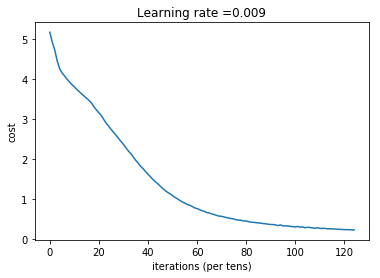

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.971
Test Accuracy: 0.222


In [39]:
_, _, parameters = model(X_train, y_train, X_test, y_test)

In [40]:
!nvidia-smi

Fri Mar  2 23:41:25 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla M40 24GB      Off  | 0000:02:00.0     Off |                    0 |
| N/A   59C    P0    69W / 250W |  22314MiB / 22939MiB |     50%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  